# [E-13] 프로젝트: 주식 예측하기

## 1. 시계열 데이터 준비: Samsung Electronics Co., Ltd. 

> * 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume
> * 날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장, Close만 사용한다. 

데이터 다운받기: https://finance.yahoo.com/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4379.354004,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4317.015625,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4496.240723,46880000.0


In [2]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5316,2021-02-25,84000.0,85400.0,83000.0,85300.0,85300.0,34155986.0
5317,2021-02-26,82800.0,83400.0,82000.0,82500.0,82500.0,38520800.0
5318,2021-03-02,85100.0,85300.0,83000.0,83600.0,83600.0,33498180.0
5319,2021-03-03,83500.0,84000.0,82800.0,84000.0,84000.0,19882132.0
5320,2021-03-04,82600.0,83200.0,82200.0,82800.0,82800.0,8003833.0


In [3]:
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64

In [4]:
print(type(ts))       # series 객체

<class 'pandas.core.series.Series'>


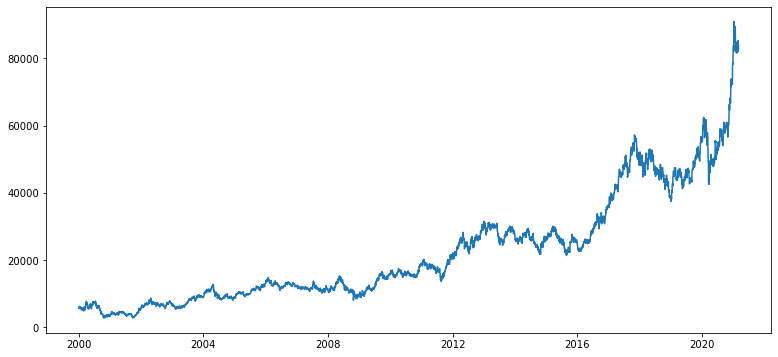

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts)

## 2. 전처리

> * 결측치 처리
> * 로그 변환

In [6]:
ts[ts.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력

Date
2005-01-03   NaN
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, dtype: float64

In [7]:
# 결측치 처리: 보간 기준은 time
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

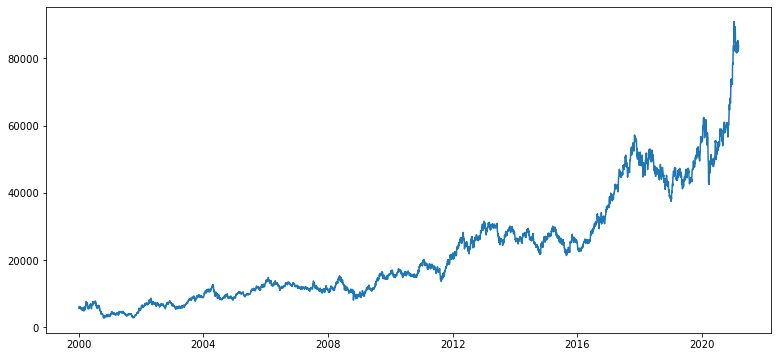

In [8]:
plt.plot(ts)

## 3. 시계열 안정성 분석

> * 정성적 그래프 분석
> * 정량적 Augmented Dicky-Fuller Test
> * 시계열 분해(Time Series Decomposition)
> * Residual 안정성 확인

In [ ]:
$ pip install statsmodels        # statsmodels 패키지 설치

In [9]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('완료')

완료


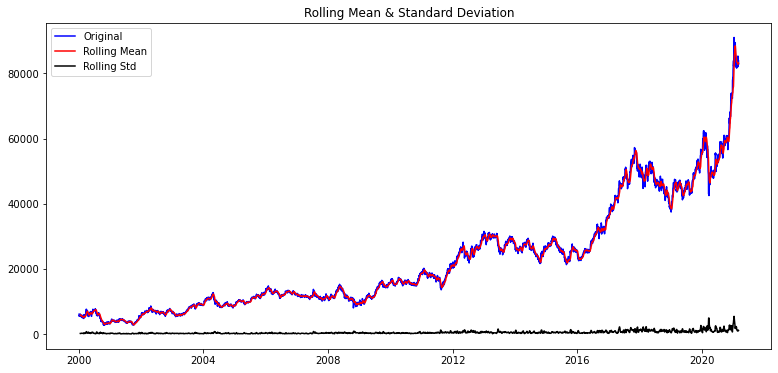

In [10]:
plot_rolling_statistics(ts, window=12)    # 정성적 그래프 분석

In [11]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('완료')

완료


In [12]:
augmented_dickey_fuller_test(ts)     # 정량적 분석

Results of Dickey-Fuller Test:
Test Statistic                    2.252560
p-value                           0.998923
#Lags Used                       26.000000
Number of Observations Used    5294.000000
Critical Value (1%)              -3.431586
Critical Value (5%)              -2.862086
Critical Value (10%)             -2.567061
dtype: float64


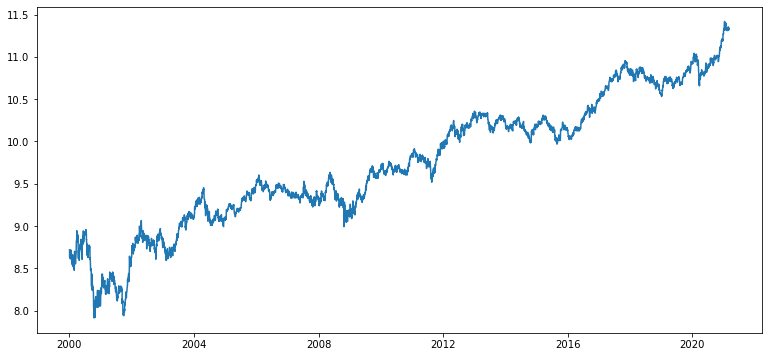

In [13]:
ts_log = np.log(ts)               # 로그 변환 시도 
plt.plot(ts_log)

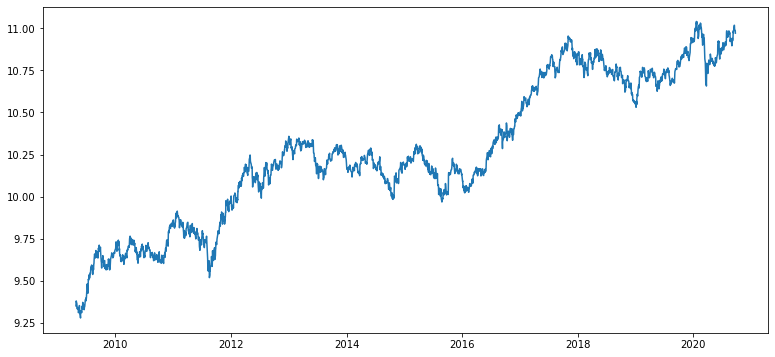

In [14]:
# 데이터 잘라내기
ts_log_cut = ts_log[int(len(ts_log)*0.45) : int(len(ts_log)*0.98)]
plt.plot(ts_log_cut)

In [15]:
augmented_dickey_fuller_test(ts_log_cut)    # 정량적 분석

Results of Dickey-Fuller Test:
Test Statistic                   -1.461940
p-value                           0.552248
#Lags Used                        4.000000
Number of Observations Used    2815.000000
Critical Value (1%)              -3.432675
Critical Value (5%)              -2.862567
Critical Value (10%)             -2.567317
dtype: float64


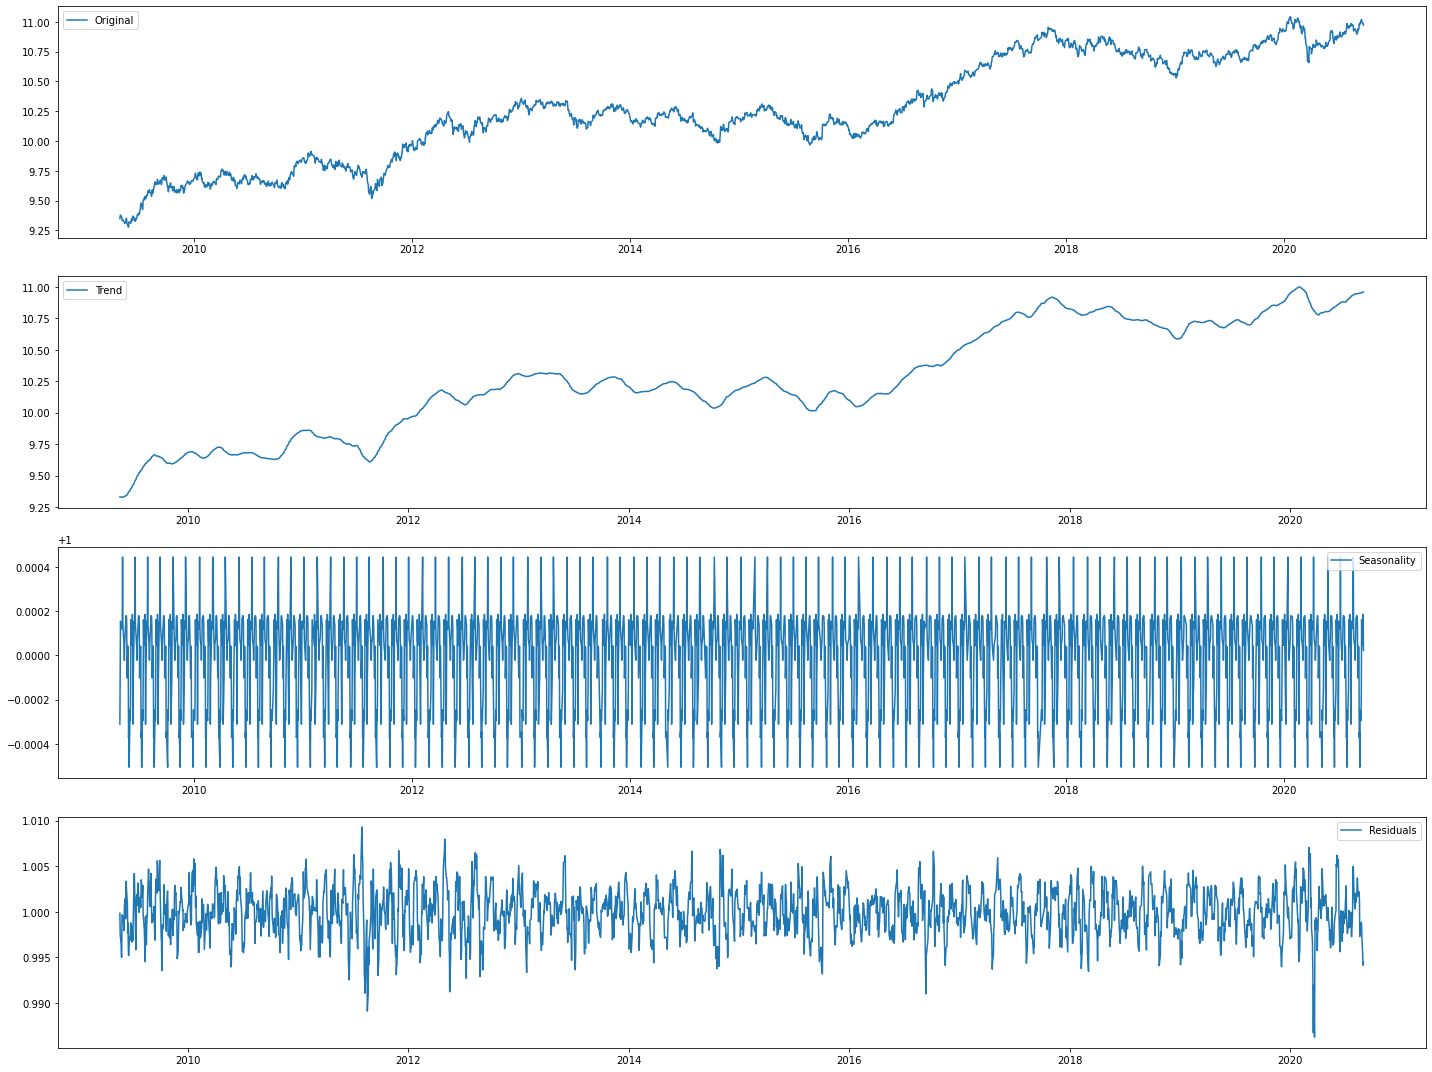

In [16]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_cut, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (20,15)
plt.subplot(411)
plt.plot(ts_log_cut, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

* Trend+Seasonality+Residual=Original

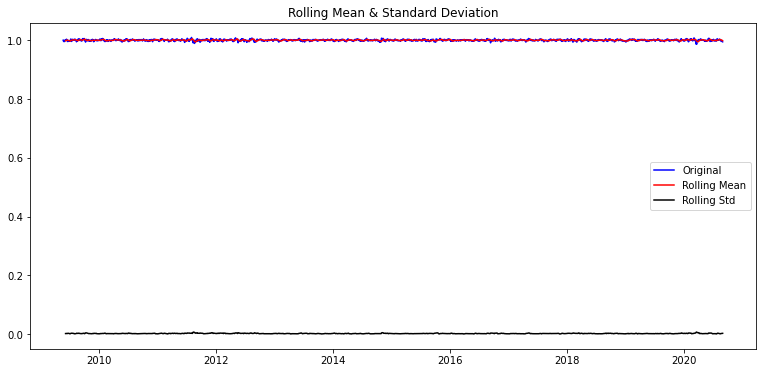

In [17]:
plt.rcParams["figure.figsize"] = (13,6)      # Residual 안정성 여부
plot_rolling_statistics(residual)

In [18]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.350137e+01
p-value                        2.972504e-25
#Lags Used                     2.700000e+01
Number of Observations Used    2.762000e+03
Critical Value (1%)           -3.432720e+00
Critical Value (5%)           -2.862587e+00
Critical Value (10%)          -2.567327e+00
dtype: float64


 p-value가 0.922973에서 3.892499e-30으로 낮아졌으며, 안정적인 시계열 데이터로 변환하였다.

## 4. 학습, 테스트 데이터셋 생성

> * 학습, 테스트 데이터셋 분리

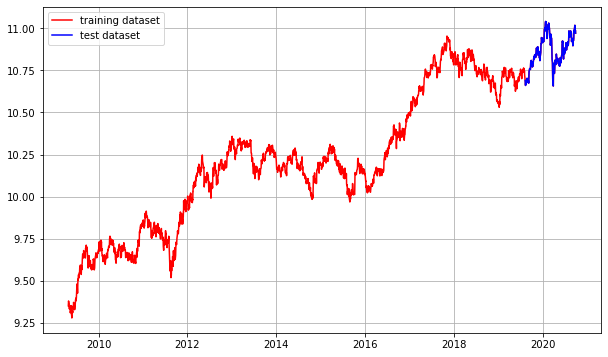

In [19]:
train_data, test_data = ts_log_cut[:int(len(ts_log_cut)*0.9)], ts_log_cut[int(len(ts_log_cut)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log_cut, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [20]:
print(ts_log_cut[:5])               # 데이터셋 형태 확인
print(train_data.shape)
print(test_data.shape)

Date
2009-04-28    9.350102
2009-04-29    9.369052
2009-04-30    9.379239
2009-05-04    9.362203
2009-05-06    9.332558
Name: Close, dtype: float64
(2538,)
(282,)


## 5. 적정 ARIMA 모수 찾기

> * ACF(Autocorrelation Function), PACF(Partial Autocorrelation Function) 그려보기 -> p,q 구하기
> * 차분 안정성 확인 -> d 구하기


ACF 는 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수이며, PACF 는 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수이다.

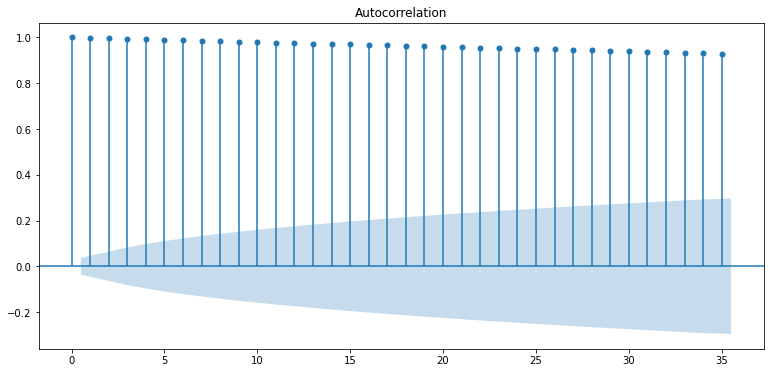

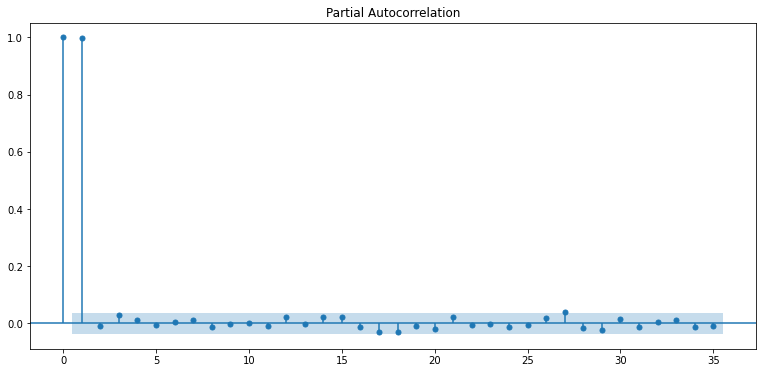

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log_cut)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log_cut)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -29.308101
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    2815.000000
Critical Value (1%)              -3.432675
Critical Value (5%)              -2.862567
Critical Value (10%)             -2.567317
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.715817e+01
p-value                        6.870223e-30
#Lags Used                     2.800000e+01
Number of Observations Used    2.789000e+03
Critical Value (1%)           -3.432697e+00
Critical Value (5%)           -2.862577e+00
Critical Value (10%)          -2.567322e+00
dtype: float64


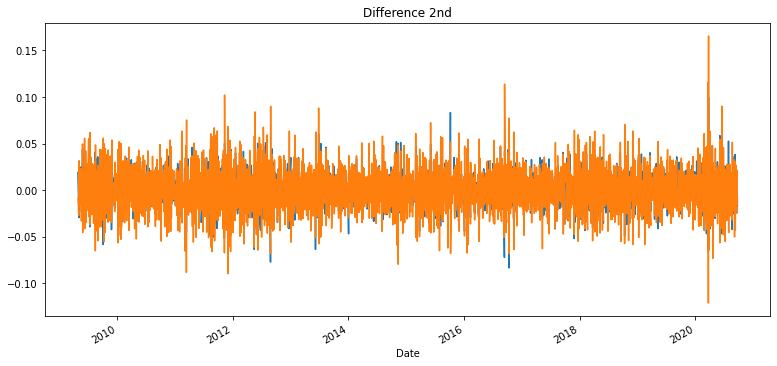

In [22]:
# 1차 차분 구하기
diff_1 = ts_log_cut.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

> **1. ARIMA(p,d,q)모형은 차수 p,d,q의 값에 따라 다른이름으로 불린다.**
> * 예1) d=0이면, ARMA(p,q)모형이라 부르고 이 모형은 정상성을 만족한다.
> * 예2) p=0이면, IMA(d,q)모형이라 부르고 d번 차분하면 MA(q)모형을 따르게 된다.
> * 예3) q=0이면, ARI(p,d)모형이라 부르며, d번 차분한 시계열이 AR(p)모형을 따르게 된다.
>   
> **2.** p 와 q 에 대해서는 통상적으로 p + q < 2, p * q = 0 인 값들을 사용하는데, 이는 p 나 q 중 하나의 값이 0이라는 뜻이다. 이렇게 하는 이유는 실제로 대부분의 시계열 데이터는 자기회귀 모형(AR)이나 이동평균 모형(MA) 중 하나의 경향만을 강하게 띄기 때문이다.
> * ACF는 시차 q 이후에 0, PACF는 시차 p 이후에 0, 적합한 값이 없으면 0으로 설정

In [ ]:
from pmdarima import auto_arima                                 # auto_arima 01

stepwise_model = auto_arima(ts_log, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

In [23]:
from statsmodels.tsa.arima_model import ARIMA             # auto_arima 02

def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [24]:
my_auto_arima(ts_log_cut,[3,3,3])

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

,order,AIC
20,p2 d1 q1,-14860.646171
13,p1 d1 q2,-14859.990493
21,p2 d1 q2,-14859.751801
18,p2 d0 q2,-14851.736397
4,p0 d1 q2,-14851.171451
19,p2 d1 q0,-14851.113063
12,p1 d1 q1,-14845.097541
10,p1 d0 q2,-14844.010457
2,p0 d1 q0,-14843.884422
3,p0 d1 q1,-14843.847210


## 6. ARIMA 모델 훈련과 테스트

> * ARIMA 모델 빌드와 훈련
> * 모델 테스트 및 플로팅
> * 최종 예측 모델 정확도 측정(MAPE)


In [25]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(2, 1, 1))  # p, d, q
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2537
Model:                 ARIMA(2, 1, 1)   Log Likelihood                6733.912
Method:                       css-mle   S.D. of innovations              0.017
Date:                Thu, 04 Mar 2021   AIC                         -13457.824
Time:                        16:24:54   BIC                         -13428.630
Sample:                             1   HQIC                        -13447.233
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      1.897      0.058   -1.78e-05       0.001
ar.L1.D.Close     0.6075      0.107      5.655      0.000       0.397       0.818
ar.L2.D.Close    -0.1068      0.020     

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


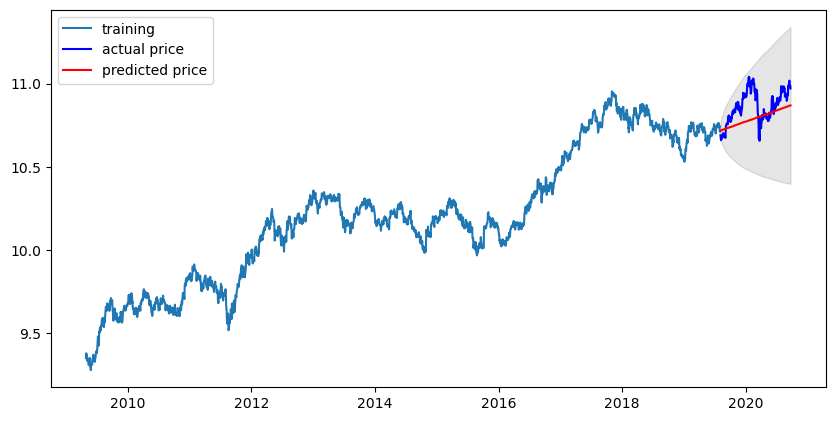

In [26]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()


In [27]:
# 최종적 모델 오차율 계산을 위해 로그 변환된 시계열을 원본의 스케일로 되돌림

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  32010064.689078026
MAE:  4478.6875049569335
RMSE:  5657.743780790893
MAPE: 8.13%


## 7. 다른 주식 종목 예측해 보기

> * 관심 종목을 골라 위 STEP 1~6의 과정을 반복해 보기

### 7-1. Hyundai Motor Company (HYMTF)

In [28]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/HYMTF.csv'
df01 = pd.read_csv(dataset_filepath)
df01.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-02-13,6.4,6.4,6.4,6.4,6.4,0
1,2009-02-17,6.4,6.4,6.4,6.4,6.4,0
2,2009-02-18,6.4,6.4,6.4,6.4,6.4,0
3,2009-02-19,6.4,6.4,6.4,6.4,6.4,0
4,2009-02-20,6.4,6.4,6.4,6.4,6.4,0


In [29]:
df01.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3028,2021-02-25,50.250000,50.250000,47.980000,48.150002,48.150002,32000
3029,2021-02-26,48.000000,48.000000,47.000000,47.480000,47.480000,8600
3030,2021-03-01,47.400002,49.259998,47.400002,49.259998,49.259998,32200
3031,2021-03-02,49.779999,49.779999,48.000000,48.029999,48.029999,23200
3032,2021-03-03,48.490002,49.799999,48.490002,48.889999,48.889999,3132


In [30]:
df01 = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts01 = df01['Close']

ts01.head()

Date
2009-02-13    6.4
2009-02-17    6.4
2009-02-18    6.4
2009-02-19    6.4
2009-02-20    6.4
Name: Close, dtype: float64

In [31]:
print(type(ts01))       # series 객체

<class 'pandas.core.series.Series'>


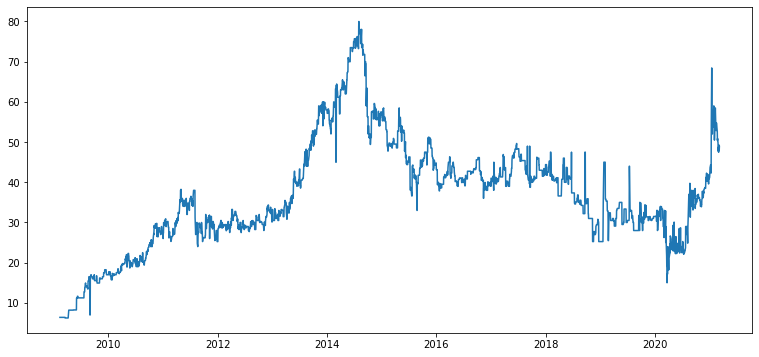

In [32]:
rcParams['figure.figsize'] = 13, 6    
plt.plot(ts01)

In [33]:
ts01[ts01.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력

Series([], Name: Close, dtype: float64)

In [34]:
# 결측치 처리: 보간 기준은 time
ts01=ts01.interpolate(method='time')
ts01[ts01.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

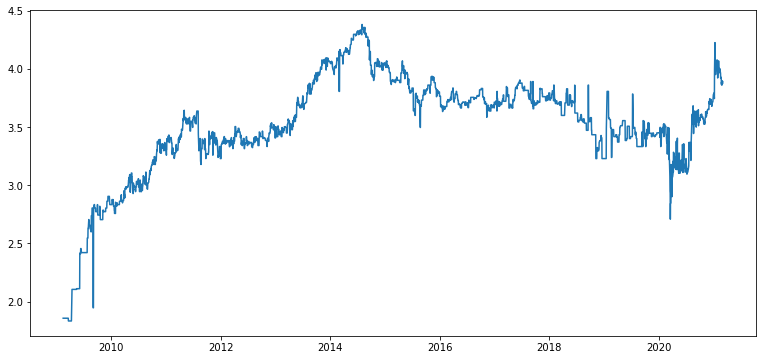

In [35]:
ts01_log = np.log(ts01)               # 로그 변환 
plt.plot(ts01_log)

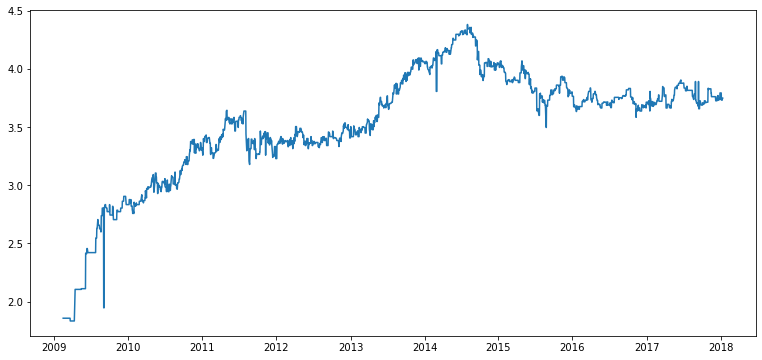

In [36]:
# 데이터 잘라내기
ts01_log_cut = ts01_log[:int(len(ts01_log)*0.74)]
plt.plot(ts01_log_cut)

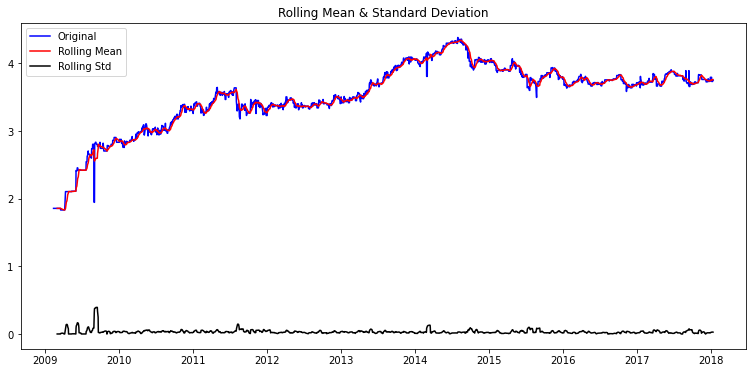

In [37]:
plot_rolling_statistics(ts01_log_cut, window=12)    # 정성적 그래프 분석

In [38]:
augmented_dickey_fuller_test(ts01_log_cut)     # 정량적 분석

Results of Dickey-Fuller Test:
Test Statistic                   -3.911976
p-value                           0.001948
#Lags Used                        9.000000
Number of Observations Used    2234.000000
Critical Value (1%)              -3.433281
Critical Value (5%)              -2.862835
Critical Value (10%)             -2.567459
dtype: float64


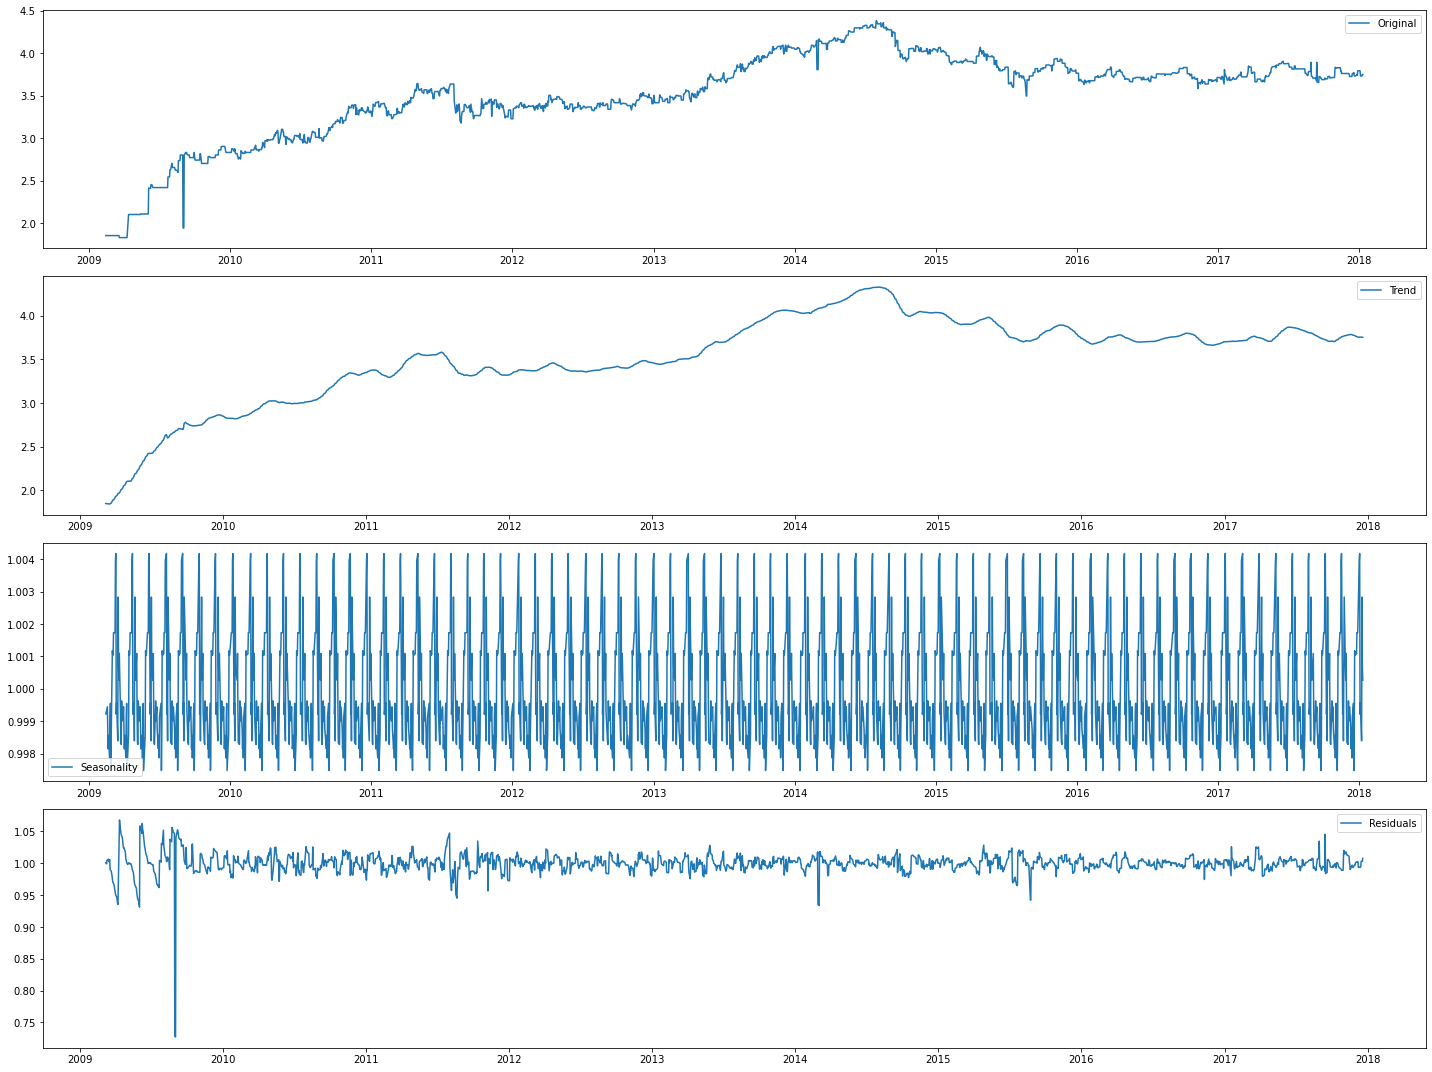

In [39]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts01_log_cut, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (20,15)
plt.subplot(411)
plt.plot(ts01_log_cut, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

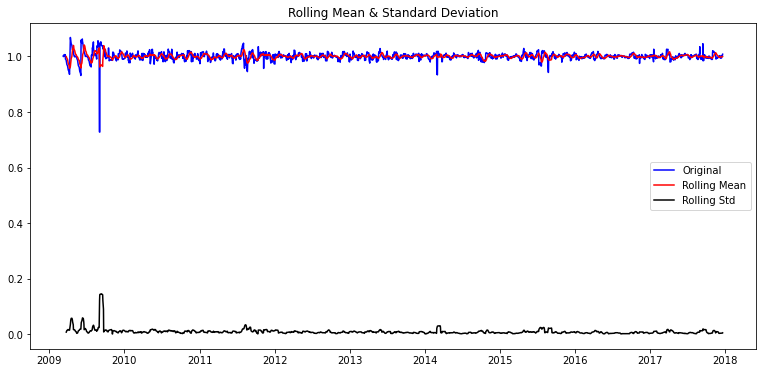

In [40]:
plt.rcParams["figure.figsize"] = (13,6)      # Residual 안정성 여부
plot_rolling_statistics(residual)

In [41]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.524059e+01
p-value                        5.169344e-28
#Lags Used                     2.700000e+01
Number of Observations Used    2.186000e+03
Critical Value (1%)           -3.433345e+00
Critical Value (5%)           -2.862863e+00
Critical Value (10%)          -2.567474e+00
dtype: float64


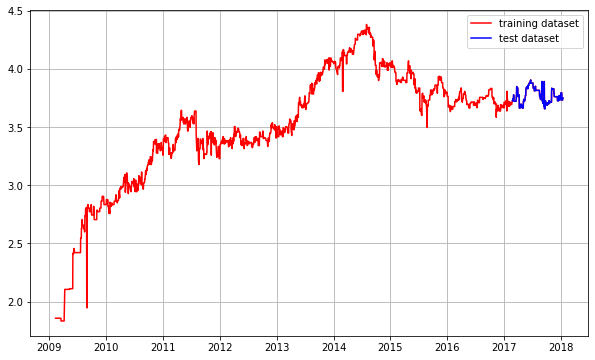

In [42]:
# 학습, 테스트 데이터셋 분리
train_data, test_data = ts01_log_cut[:int(len(ts01_log_cut)*0.9)], ts01_log_cut[int(len(ts01_log_cut)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts01_log_cut, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

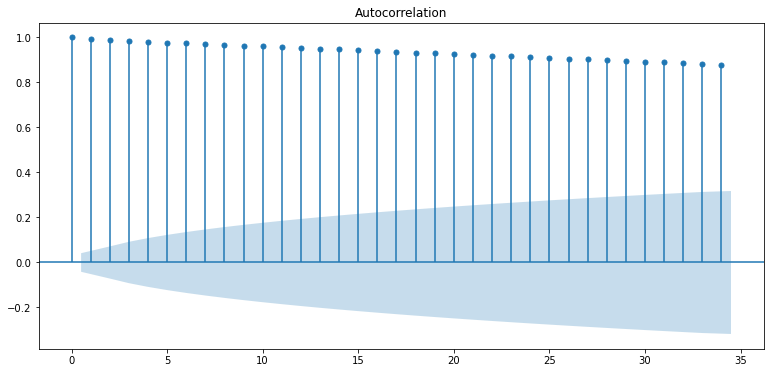

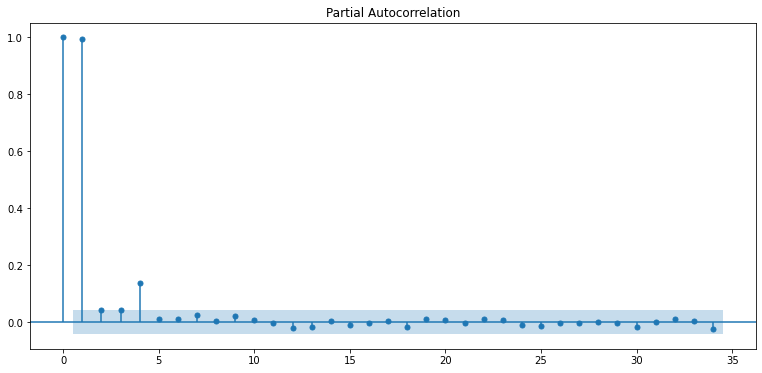

In [43]:
plot_acf(ts01_log_cut)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts01_log_cut)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -20.744106
p-value                           0.000000
#Lags Used                        8.000000
Number of Observations Used    2234.000000
Critical Value (1%)              -3.433281
Critical Value (5%)              -2.862835
Critical Value (10%)             -2.567459
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.658217e+01
p-value                        1.830055e-29
#Lags Used                     2.700000e+01
Number of Observations Used    2.214000e+03
Critical Value (1%)           -3.433307e+00
Critical Value (5%)           -2.862846e+00
Critical Value (10%)          -2.567465e+00
dtype: float64


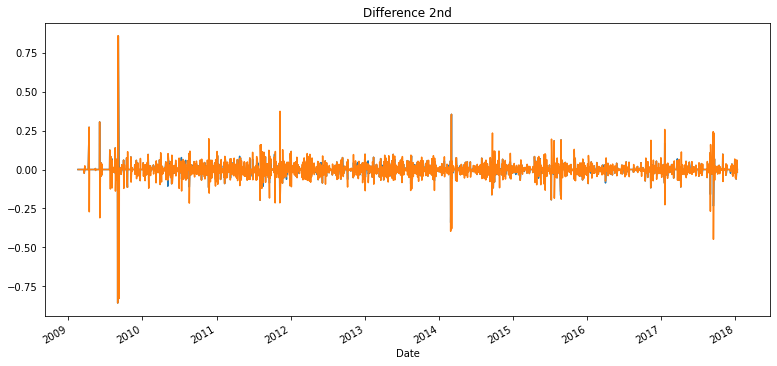

In [44]:
# 1차 차분 구하기
diff_1 = ts01_log_cut.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [46]:
my_auto_arima(ts01_log_cut,[3,3,3])                # auto_arima 02

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

,order,AIC
20,p2 d1 q1,-8131.347071
14,p1 d1 q2,-8127.655394
13,p1 d1 q1,-8120.114266
21,p2 d1 q2,-8119.500744
18,p2 d0 q2,-8118.731132
17,p2 d0 q1,-8111.038504
5,p0 d1 q2,-8050.760421
11,p1 d0 q2,-8044.848201
19,p2 d1 q0,-8025.192927
4,p0 d1 q1,-8017.661566


In [47]:
# Build Model
model = ARIMA(train_data, order=(2, 1, 1))  # p, d, q
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2018
Model:                 ARIMA(2, 1, 1)   Log Likelihood                3619.734
Method:                       css-mle   S.D. of innovations              0.040
Date:                Thu, 04 Mar 2021   AIC                          -7229.467
Time:                        16:29:31   BIC                          -7201.418
Sample:                             1   HQIC                         -7219.173
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.000      2.148      0.032    8.05e-05       0.002
ar.L1.D.Close     0.6926      0.037     18.890      0.000       0.621       0.765
ar.L2.D.Close    -0.1028      0.024     

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


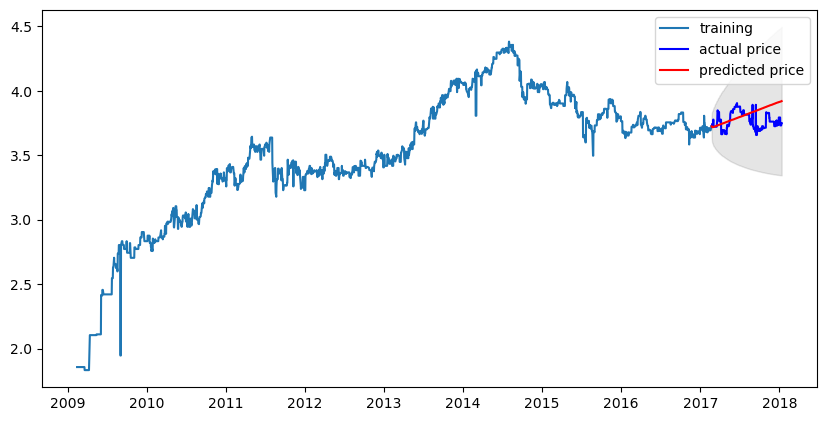

In [48]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [49]:
# 최종적 모델 오차율 계산을 위해 로그 변환된 시계열을 원본의 스케일로 되돌림

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  20.85626884343135
MAE:  3.781103299659322
RMSE:  4.566866414012058
MAPE: 8.86%


### 7-2. AstraZeneca PLC (AZN)

In [50]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AZN.csv'
df02 = pd.read_csv(dataset_filepath)
df02.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-05-12,5.291667,5.291667,5.020833,5.041667,1.862110,414000
1,1993-05-13,5.000000,5.000000,4.791667,4.854167,1.792858,792600
2,1993-05-14,4.875000,4.875000,4.791667,4.791667,1.769774,646200
3,1993-05-17,4.833333,4.895833,4.833333,4.895833,1.808247,68400
4,1993-05-18,4.895833,4.895833,4.833333,4.854167,1.792858,69000


In [51]:
df02.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6998,2021-02-25,49.849998,49.869999,48.750000,48.910000,48.910000,12795900
6999,2021-02-26,48.849998,48.919998,47.980000,48.380001,48.380001,8547800
7000,2021-03-01,48.459999,48.680000,48.080002,48.090000,48.090000,11374500
7001,2021-03-02,48.400002,48.430000,47.669998,47.730000,47.730000,14356500
7002,2021-03-03,47.639999,47.639999,46.849998,47.160000,47.160000,14030700


In [52]:
df02 = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts02 = df02['Close']

ts02.head()

Date
1993-05-12    5.041667
1993-05-13    4.854167
1993-05-14    4.791667
1993-05-17    4.895833
1993-05-18    4.854167
Name: Close, dtype: float64

In [53]:
print(type(ts02))       # series 객체

<class 'pandas.core.series.Series'>


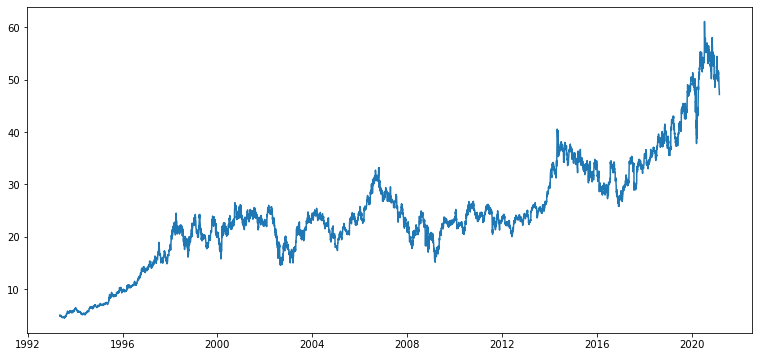

In [54]:
rcParams['figure.figsize'] = 13, 6    
plt.plot(ts02)

In [55]:
ts02[ts02.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력

Series([], Name: Close, dtype: float64)

In [56]:
# 결측치 처리: 보간 기준은 time
ts02=ts02.interpolate(method='time')
ts02[ts02.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

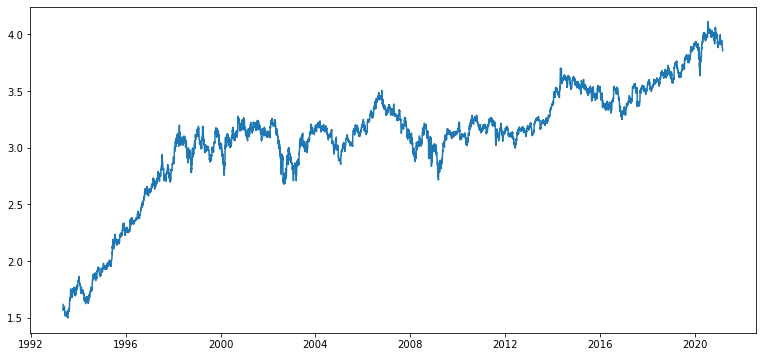

In [57]:
ts02_log = np.log(ts02)               # 로그 변환 
plt.plot(ts02_log)

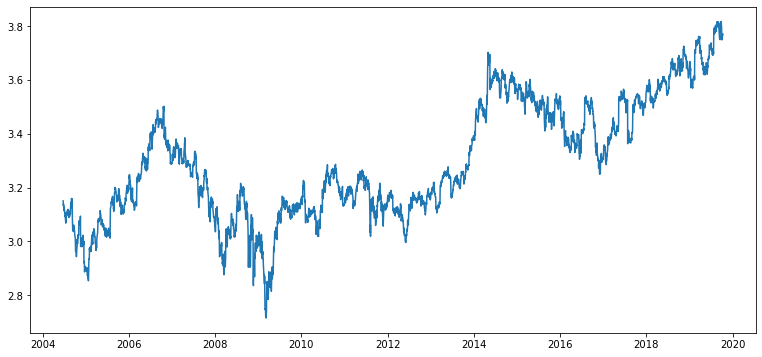

In [58]:
# 데이터 잘라내기
ts02_log_cut = ts02_log[int(len(ts02_log)*0.40):int(len(ts02_log)*0.95)]
plt.plot(ts02_log_cut)

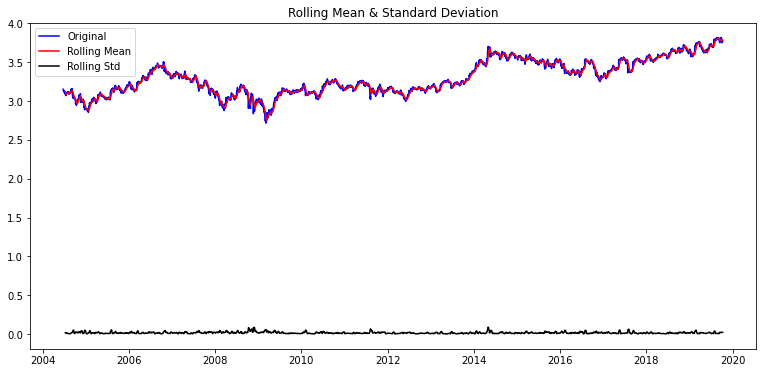

In [59]:
plot_rolling_statistics(ts02_log_cut, window=12)    # 정성적 그래프 분석

In [60]:
augmented_dickey_fuller_test(ts02_log_cut)     # 정량적 분석

Results of Dickey-Fuller Test:
Test Statistic                   -1.381304
p-value                           0.591206
#Lags Used                       14.000000
Number of Observations Used    3836.000000
Critical Value (1%)              -3.432056
Critical Value (5%)              -2.862294
Critical Value (10%)             -2.567171
dtype: float64


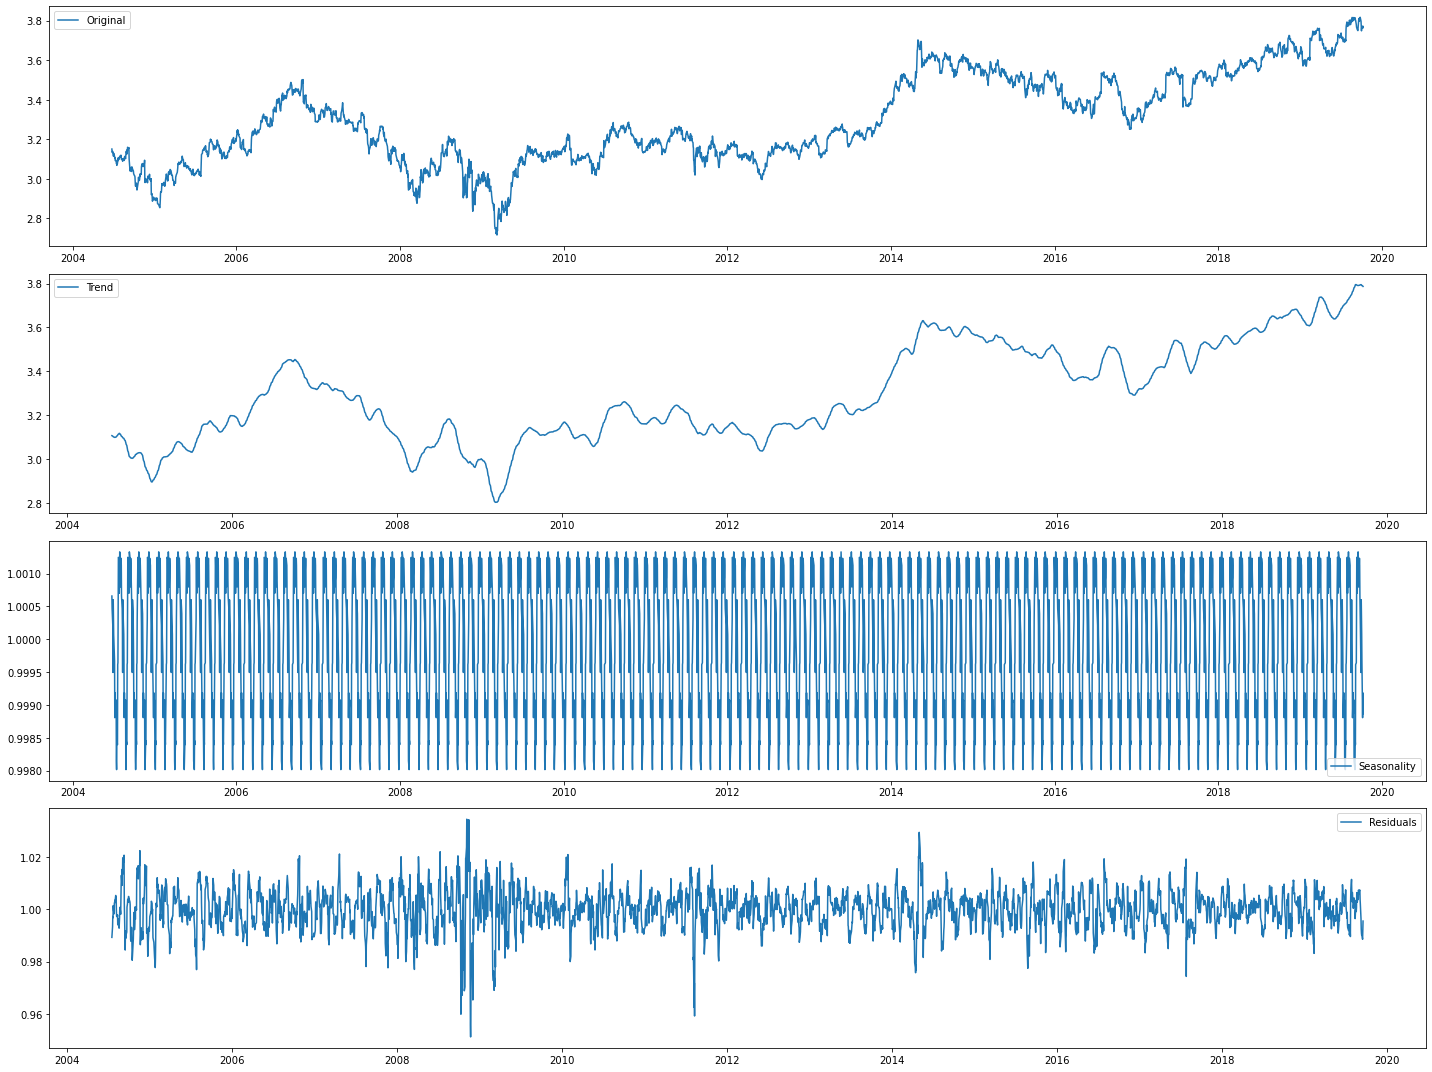

In [61]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts02_log_cut, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (20,15)
plt.subplot(411)
plt.plot(ts02_log_cut, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

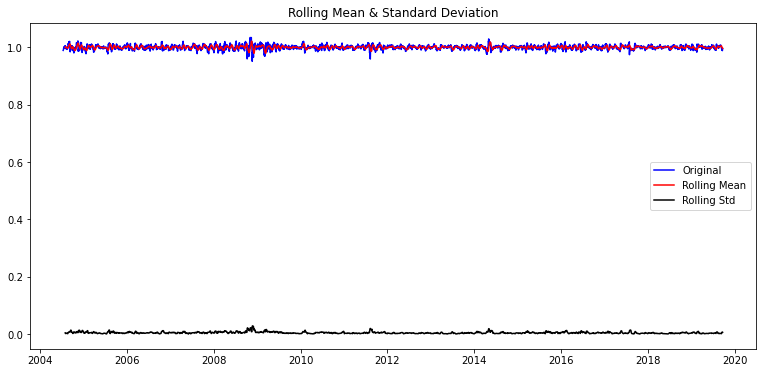

In [62]:
plt.rcParams["figure.figsize"] = (13,6)      # Residual 안정성 여부
plot_rolling_statistics(residual)

In [63]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.668860e+01
p-value                        1.495162e-29
#Lags Used                     2.500000e+01
Number of Observations Used    3.795000e+03
Critical Value (1%)           -3.432074e+00
Critical Value (5%)           -2.862302e+00
Critical Value (10%)          -2.567176e+00
dtype: float64


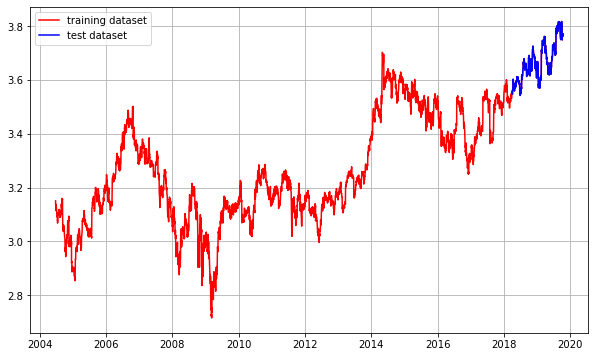

In [64]:
# 학습, 테스트 데이터셋 분리
train_data, test_data = ts02_log_cut[:int(len(ts02_log_cut)*0.9)], ts02_log_cut[int(len(ts02_log_cut)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts02_log_cut, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

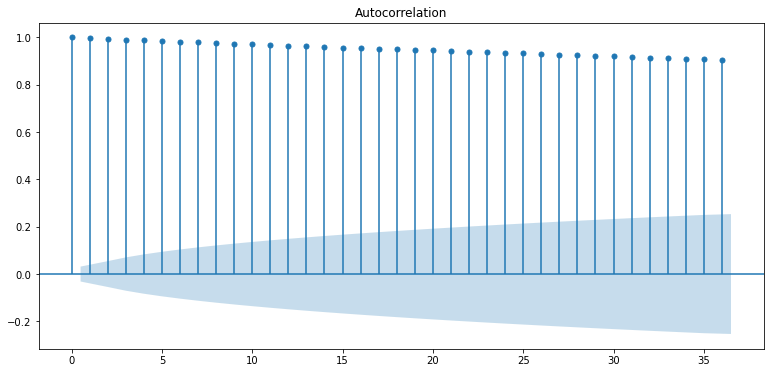

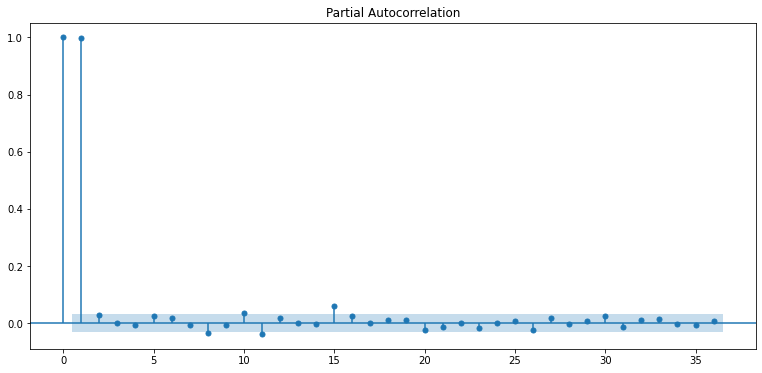

In [65]:
plot_acf(ts02_log_cut)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts02_log_cut)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.810440e+01
p-value                        2.548103e-30
#Lags Used                     1.300000e+01
Number of Observations Used    3.836000e+03
Critical Value (1%)           -3.432056e+00
Critical Value (5%)           -2.862294e+00
Critical Value (10%)          -2.567171e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -19.042984
p-value                           0.000000
#Lags Used                       30.000000
Number of Observations Used    3818.000000
Critical Value (1%)              -3.432064
Critical Value (5%)              -2.862297
Critical Value (10%)             -2.567173
dtype: float64


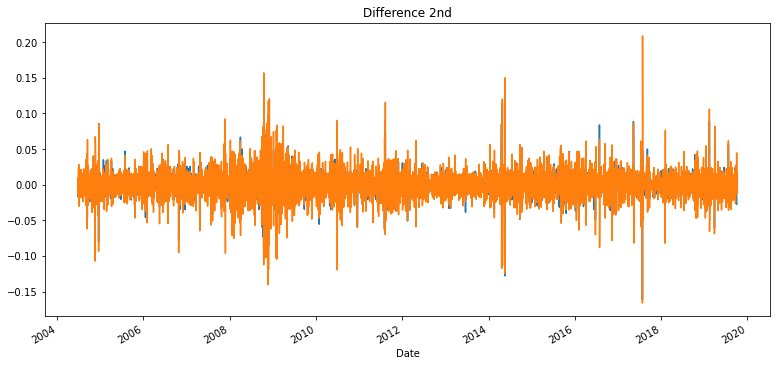

In [66]:
# 1차 차분 구하기
diff_1 = ts02_log_cut.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [67]:
my_auto_arima(ts02_log_cut,[3,3,3])      # auto_arima 02

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

,order,AIC
13,p1 d1 q1,-21112.403729
19,p2 d0 q1,-21110.610828
10,p1 d0 q1,-21110.092706
18,p2 d0 q0,-21110.045712
4,p0 d1 q1,-21109.173189
12,p1 d1 q0,-21109.112586
23,p2 d1 q2,-21108.638966
9,p1 d0 q0,-21108.518489
11,p1 d0 q2,-21108.237657
21,p2 d1 q0,-21107.385675


In [68]:
# Build Model
model = ARIMA(train_data, order=(1, 1, 1))  # p, d, q
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3464
Model:                 ARIMA(1, 1, 1)   Log Likelihood                9445.175
Method:                       css-mle   S.D. of innovations              0.016
Date:                Thu, 04 Mar 2021   AIC                         -18882.349
Time:                        16:32:41   BIC                         -18857.749
Sample:                             1   HQIC                        -18873.565
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001      0.000      0.684      0.494      -0.000       0.000
ar.L1.D.Close     0.9617      0.028     34.212      0.000       0.907       1.017
ma.L1.D.Close    -0.9746      0.023    -

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


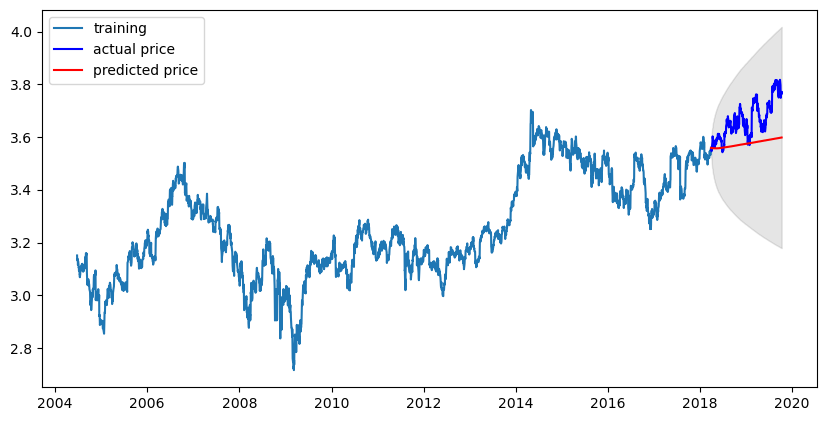

In [69]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [70]:
# 최종적 모델 오차율 계산을 위해 로그 변환된 시계열을 원본의 스케일로 되돌림

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  18.155150215206564
MAE:  3.515340732477317
RMSE:  4.260886083340713
MAPE: 8.59%


## 결과

> Samsung Electronics CO., Hyundai Motor Company,  AstraZeneca PLC 세 종목의 주식 시계열을 분석하였다. 최종적으로 MAPE가 8.13%, 8.86%, 8.59%으로 10% 미만의 정확도로 예측되었다. 

## 총평

> 시계열 데이터 분석에 관심이 많았는데, 이번 노드를 통해 시계열 데이터의 대략적인 분석 과정을 실습할 수 있어서 좋았다. 시계열데이터도 결국에는 회귀모형이기 때문에 데이터의 안정성이 전제되어야 좋은 결과값으로 이어졌다. 변동의 폭이 큰 시계열 데이터의 경우, 외부 환경 변화로 인하여 갑작스럽게 변화한 데이터의 일부는 삭제하고 분석을 진행해야 10% 미만dml MAPE 값을 얻을 수 있었다. ARIMA 모델 이외에도 동적회귀모델 등 추가적인 공부가 필요하다.

**참고하면 좋을 도서:** 
Rob J Hyndman and George Athanasopoulos, 'Forecasting: Principles and Practice'

https://otexts.com/fppkr/arima.html